PyTorch의 Dataset과 DataLoader를 이용하면 학습을 위한 방대한 데이터를 미니배치 단위로 처리할 수 있고, 데이터를 무작위로 섞음으로써 학습의 효율성을 향상시킬 수 있다.

또한 데이터를 여러개의 GPU를 사용해 병렬처리로 학습할 수도 있다. 

아래의 코드는 Dataset과 DataLoader를 사용하지 않고 매 에폭마다 학습 데이터 전체를 입력해 학습하는 코드이다.

In [3]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from torch.utils.data import TensorDataset, DataLoader

In [4]:
iris = load_iris()

In [5]:
X = iris.data[:100]
Y = iris.target[:100]

In [6]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

In [7]:
net = nn.Linear(4, 1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [8]:
losses = []

In [13]:
for epoc in range(100):
    batch_loss = 0.0
    
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred.view_as(Y), Y)
    loss.backward()
    optimizer.step()
    batch_loss += loss.item()
    
    losses.append(batch_loss)

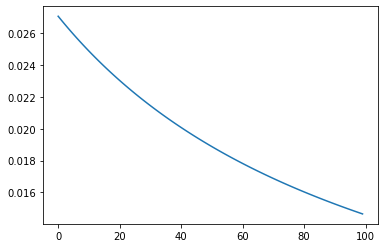

In [14]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()